### Regresion Logistica- Bank predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/Z420/AnacondaProjects/python-ml-course-master/datasets/bank/bank.csv', sep = ';')

In [3]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape


(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
data['y'] = data['y'].map({'yes': 1, 'no': 0}) # variables categoricas 

In [7]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
# Mejorando la vista de las calumnas
data.loc[data['education']  == 'basic.9y', 'education'] = 'Basic'
data.loc[data['education']  == 'basic.6y', 'education'] = 'Basic'
data.loc[data['education']  == 'basic.4y', 'education'] = 'Basic'
data.loc[data['education']  == 'high.school', 'education'] = 'High School'
data.loc[data['education']  == 'university.degree', 'education'] = 'Uiversity'
data.loc[data['education']  == 'professional.course', 'education'] = 'Pofessional curse'
data.loc[data['education']  == 'illiterate', 'education'] = 'Iliterate'
data.loc[data['education']  == 'unknown', 'education'] = 'Unnown'

In [9]:
data['education'].unique()

array(['Basic', 'High School', 'Uiversity', 'Pofessional curse', 'Unnown',
       'Iliterate'], dtype=object)

In [10]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Iliterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Pofessional curse,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
Uiversity,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unnown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


In [13]:
%matplotlib inline

Text(0,0.5,'Frecuencia de compra del producto')

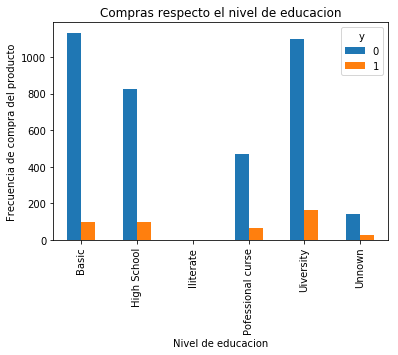

In [14]:
pd.crosstab(data.education, data.y).plot(kind ='bar')
plt.title('Compras respecto el nivel de educacion')
plt.xlabel('Nivel de educacion')
plt.ylabel('Frecuencia de compra del producto')

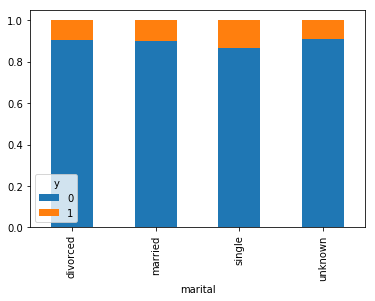

In [15]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis= 0).plot(kind='bar', stacked= True)

In [16]:
table_date = pd.crosstab(data.day_of_week, data.y)
table_date

y,0,1
day_of_week,,
fri,685,83
mon,757,98
thu,764,96
tue,750,91
wed,712,83


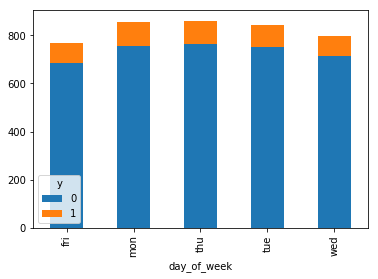

In [17]:
table_date.plot(kind= 'bar', stacked = True)

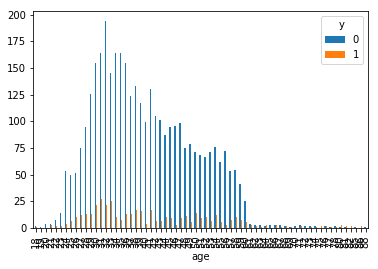

In [18]:
pd.crosstab(data.age, data.y).plot(kind = 'bar')

In [19]:
### Conversion de las variables categoricas

In [20]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan',
              'contact', 'month', 'day_of_week', 'poutcome']
list_features = []
for category in categories:
    cat_list = 'cat'+ '_'+ category
    cat_dummies = pd.get_dummies(data[category], prefix = cat_list)
    list_features.append(str(cat_list))
    data_new = data.join(cat_dummies)
    data = data_new
list_features

['cat_job',
 'cat_marital',
 'cat_education',
 'cat_default',
 'cat_housing',
 'cat_loan',
 'cat_contact',
 'cat_month',
 'cat_day_of_week',
 'cat_poutcome']

In [21]:
features_list = data.columns.values.tolist()

In [22]:
features_to_keep = [v for v in features_list if v not in categories]### conservando solo las variables categoricas 

In [23]:
data = data[features_to_keep]# dataset con solo variables utiles

In [24]:
y =  data['y']

In [25]:
X = data[data.columns.difference(['y'])]

In [26]:
X.columns.values

array(['age', 'campaign', 'cat_contact_cellular', 'cat_contact_telephone',
       'cat_day_of_week_fri', 'cat_day_of_week_mon',
       'cat_day_of_week_thu', 'cat_day_of_week_tue',
       'cat_day_of_week_wed', 'cat_default_no', 'cat_default_unknown',
       'cat_default_yes', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Iliterate',
       'cat_education_Pofessional curse', 'cat_education_Uiversity',
       'cat_education_Unnown', 'cat_housing_no', 'cat_housing_unknown',
       'cat_housing_yes', 'cat_job_admin.', 'cat_job_blue-collar',
       'cat_job_entrepreneur', 'cat_job_housemaid', 'cat_job_management',
       'cat_job_retired', 'cat_job_self-employed', 'cat_job_services',
       'cat_job_student', 'cat_job_technician', 'cat_job_unemployed',
       'cat_job_unknown', 'cat_loan_no', 'cat_loan_unknown',
       'cat_loan_yes', 'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_month_apr',
       'cat_m

In [27]:
n = 12 # numero de fuatures para entrenar
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
rfe =  RFE(lr, n)
rfe = rfe.fit(X, y)

In [30]:
rfe.support_ # muestra de las variables utiles para entrenar el modelo

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False, False,  True, False, False,  True])

In [31]:
z= zip(rfe.support_,X.columns.values )
list_  = list(z)

In [32]:
list_features_good = [v for v in list_ if 'True' in v ]

In [34]:
X_cols= [] ### Contenedor de las features utiles
for i in list_:
    if i[0] ==True:
        print(i[1])
        X_cols.append(i[1])

cat_job_entrepreneur
cat_job_self-employed
cat_month_dec
cat_month_jul
cat_month_jun
cat_month_mar
cat_month_may
cat_month_oct
cat_poutcome_failure
cat_poutcome_success
euribor3m
previous


In [36]:
X = X[X_cols] # asignamos nuestras variables utiles
y = y

In [41]:
from sklearn import linear_model ## libreria para ML usando Regression Logistica

In [42]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
str(logit_model.score(X,y) * 100) + ' %' ## tenemos un SCORE de 90%

'90.21607186210245 %'

In [44]:
y.mean()

0.10949259529011895

In [45]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))# observamos nuestras constantes con respectiva varible

,0,1
0,cat_job_entrepreneur,[-0.34306615549906283]
1,cat_job_self-employed,[-0.3350641645775227]
2,cat_month_dec,[0.873316799904905]
3,cat_month_jul,[0.38208744410126405]
4,cat_month_jun,[0.509694986992925]
5,cat_month_mar,[1.270361228525268]
6,cat_month_may,[-0.7430896282441308]
7,cat_month_oct,[0.4118557434370328]
8,cat_poutcome_failure,[-0.7531618695419469]
9,cat_poutcome_success,[1.0778325336341843]


In [46]:
from sklearn.cross_validation import train_test_split # herramienta para la separacion de muestras TRAIN y TEST

C:\Users\Z420\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)# nuestra muestra test tendra un 30% del dataset

In [48]:
lm =  linear_model.LogisticRegression()
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
probs = lm.predict_proba(X_test) # prediccion de las probabilidades

In [50]:
probs # el primer valor indica la que tan seguro se esta que la probababilidad es correcta
# osea hay 93 % de certeza de que el usuario compre el producto con probabilidad de 6%

array([[0.93352157, 0.06647843],
       [0.88259365, 0.11740635],
       [0.93040666, 0.06959334],
       ...,
       [0.73273217, 0.26726783],
       [0.97862459, 0.02137541],
       [0.24746608, 0.75253392]])

prediction = lm.predict(X_test)

In [75]:
prediction

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

para este caso podemos observar que el threshold o la probabilidad base, es de donde nos estaremos basando para dar separa los grupos dada sus probabilidad,
podemos estimar, que con el hecho de que una persona tenga una probabilidad de comprar el producto de 10% ya es algo util, asi abarcamos muchas mas gentes
que concentrarnos solo en las pocas 20 personas que podria tener una probabilidad de 90%  de adquirir el producto.

In [76]:
prob =  probs[:,1]
prob_df = pd.DataFrame(prob)
predic_ = pd.DataFrame(prediction)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] > threshold,1,0)
prob_df.head()

,0,prediction
0,0.066478,0
1,0.117406,1
2,0.069593,0
3,0.062666,0
4,0.065086,0


In [77]:
pd.crosstab(prob_df.prediction, 'count') # 343 personas sobrepasas en porcentage de adquisiicion de 10%

col_0,count
prediction,
0,893
1,343


### Validacion del modelo

In [78]:
from sklearn import metrics

In [81]:
metrics.accuracy_score(y_test, prediction) ## Acertamos en un 90% de los casos

0.9021035598705501

### Validacion cruzada

In [82]:
from sklearn.cross_validation import cross_val_score

In [83]:
scores =  cross_val_score (linear_model.LogisticRegression(), X,y, scoring = 'accuracy', cv  =10)

In [85]:
scores.mean()#~el cross validation nos da una eficacia de 90% muy parecidad a
# la presicion del modelo original

0.9019115405705567